# INTRODUCTION

With a financial dataset, I will try to predict if a person is able to pay a loan depending on certains variables.

# IMPORTING LIBRARIES AND THE DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loan = pd.read_csv("loan_data.csv")
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# SIMPLE EXPLORATORY DATA  ANALYSIS

First, I tried to get some overall statictic information and info about the dataset.

In [4]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Let's plot a histogram to see if customers are able to pay depending on their credit record (FICO). Most of people who has a good FICO, they are able to get the loan.

Text(0.5, 0, 'FICO')

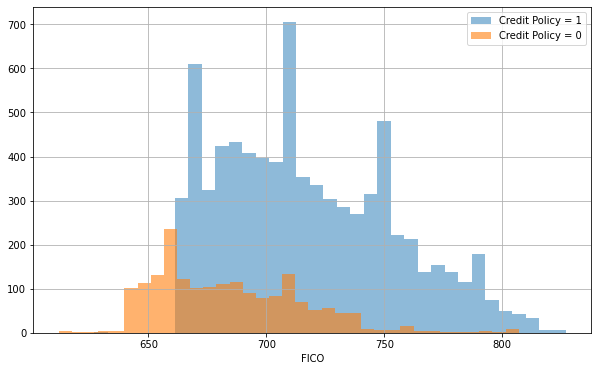

In [8]:
plt.figure(figsize=(10,6))
loan[loan["credit.policy"]==1]["fico"].hist(bins=35, label = "Credit Policy = 1", alpha = 0.5)
loan[loan["credit.policy"]==0]["fico"].hist(bins=35, label = "Credit Policy = 0", alpha = 0.6)
plt.legend()
plt.xlabel("FICO")

This next viz has the same idea, but now depending if customers are still paying their loan. In this case, most of our customers are paying the loan yet.

Text(0.5, 0, 'FICO')

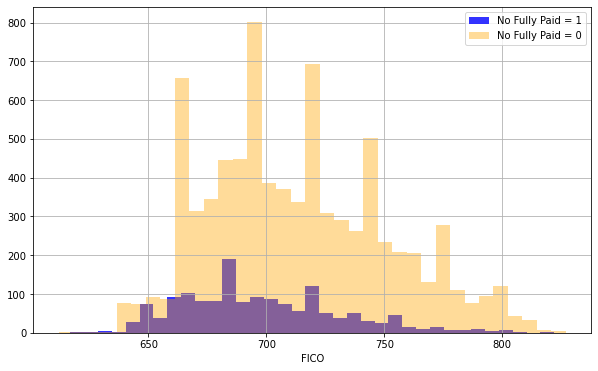

In [13]:
plt.figure(figsize=(10,6))
loan[loan["not.fully.paid"]==1]["fico"].hist(bins=35, label = "No Fully Paid = 1", alpha = 0.8, color = "blue")
loan[loan["not.fully.paid"]==0]["fico"].hist(bins=35, label = "No Fully Paid = 0", alpha = 0.4, color = "orange")
plt.legend()
plt.xlabel("FICO")

Following the previous plot. Now let's see how many loans we have depending if they are still paid or not on each loan reason.

<AxesSubplot:xlabel='purpose', ylabel='count'>

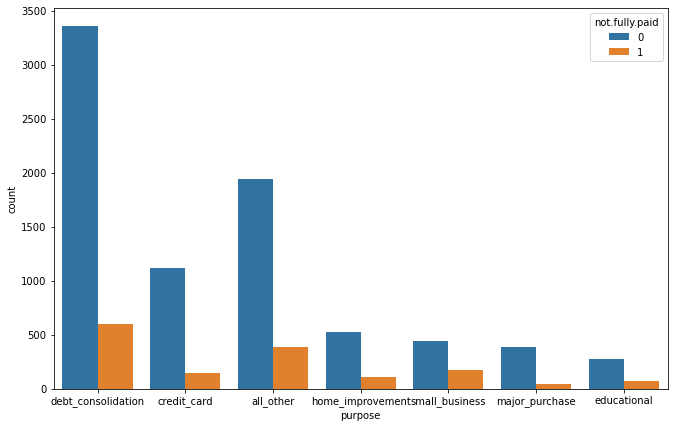

In [15]:
plt.figure(figsize=(11,7))
sns.countplot(x = "purpose", hue= "not.fully.paid", data = loan)

With this correlation plot is confirmed that people who usually has a good FICO, they recienve less interest rate.

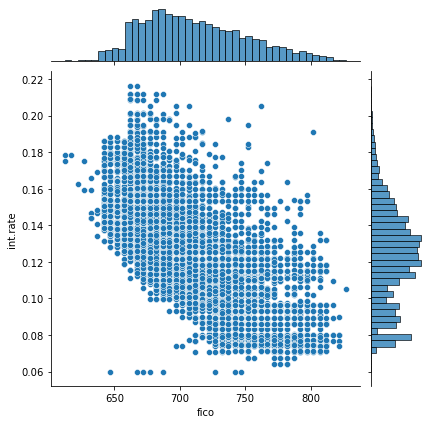

In [16]:
sns.jointplot(x="fico", y="int.rate", data = loan)

With this second correlation plot, we can say that besides people with better FICO get better interest rate, also this is more notable if the customer already paid their loan.

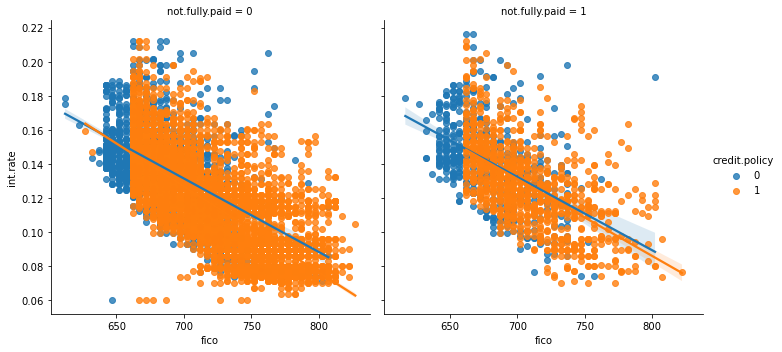

In [19]:
sns.lmplot(y="int.rate", x="fico", data = loan, hue="credit.policy", col = "not.fully.paid")

# PRE MACHINE LEARNING

We need to quit the only non numeric variable that it is "purpose". For that reason, we are going to transform into new columns and with ceros and ones is what we are going to notice the reason for the loan.

In [22]:
cat_feats = ["purpose"]
final_loan = pd.get_dummies(loan, columns = cat_feats, drop_first= True)
final_loan.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# MACHINE LEARNING

On this kind of ML scenarios, we usually use two models, the Decision Tree and the Random Forest. Let's start with the split process that is needed in both ML models.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X= final_loan.drop("not.fully.paid", axis =1)
y= final_loan["not.fully.paid"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.3, random_state = 101)

Let's start with the Decision Tree process and its performance report.

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
pre = dtree.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print(classification_report(y_test, pre))
print(confusion_matrix(y_test, pre))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874

[[1998  433]
 [ 343  100]]


The next one is the Random Forest with its report.

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier(n_estimators=300)

In [35]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [38]:
pre_rfc = rfc.predict(X_test)

In [39]:
print(classification_report(y_test, pre_rfc))
print(confusion_matrix(y_test, pre_rfc))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874

[[2423    8]
 [ 434    9]]


# FINAL CONCLUSION

It is typical that the Random Forest gives a better performance that the Decision Tree, this is because the Random Forest takes the mean of multiples results and Decision Tree just make one result, in this case 300 different trees vs one tree. But on here report we have an important insight. The recall. On the first one, the recall is better than the second one. So depending of your goal, you will decide which ML model use.

*** More formally, recall is defined as the ratio of true positives (TP) to the sum of true positives and false negatives (FN).

Recall is often used in combination with precision, another performance metric, to evaluate the performance of a classifier. A classifier that has high recall and high precision is considered to be a good classifier. However, there is usually a trade-off between recall and precision, and depending on the specific problem and application, one metric may be more important than the other.